# COVID-19 RELATED DATA ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px 
from matplotlib import pyplot as plt
import pygal
from IPython.display import SVG, display
%matplotlib notebook

In [ ]:
#pip install pygal_maps_world
#!pip install cairosvg
#!pip install  plotly.express
#!pip install pygal
#import sys
#!conda install --yes --prefix {sys.prefix} plotly


## PROJECT OVERVIEW

Current days the entire world has the same goals: define the reasons of COVID-19 pandemic starting, propogate coronavirus vaccination and analyze all the factors which can make COVID-19 cases to go to zero. As those goals look rather impressive they can be achived through the regular analysis of COVID-19 statistics including new cases, fatality. testing etc. 
The goal of this project is analysis of real-life COVID-19 data, defining factors which are important for virus propogation, hospitality and fatality rates.

## DATA DESCRIPTION

As COVID pandemic became the biggest problem of 2020, there are lot of data sources, which collects and organizes different statistics relevant coronavirus disease. This project uses different datsets collected by Epidemic Intelligence team based on different authorized reports [1]. Therefore ECDC's data keep worlwide data on daily and weekly basis, the most complete statistics provided for the European Union (EU) with 7-days frequency. That happens because every week a team of epidemiologists screen up to 500 relevant sources to collect the latest figures for publication [2]. 
Datasource includes lot of COVID-related parameters, among them testing, new cases, hospitality, fatality etc. Current project uses 3 datasets: hospitality statistics [3], testing statistics [4] and new cases statistics [5]. Each of the links provided here keeps data link and data glossary also. 
All files  available at csv format have been downloaded to the locally storage. Statistics describes 2020 year, each country started data gathering as far as first episodes appeared. Data heads for all three files are described below.


In [3]:
cases = pd.read_csv('cases_death.csv')
tests = pd.read_csv('testing_rate.csv')
hospitality = pd.read_csv('hospitality.csv')
print(cases.head())
print(tests.head())
print(hospitality.head())

      dateRep year_week  cases_weekly  deaths_weekly countriesAndTerritories  \
0  04/01/2021   2020-53           902             60             Afghanistan   
1  28/12/2020   2020-52          1994             88             Afghanistan   
2  21/12/2020   2020-51           740            111             Afghanistan   
3  14/12/2020   2020-50          1757             71             Afghanistan   
4  07/12/2020   2020-49          1672            137             Afghanistan   

  geoId countryterritoryCode  popData2019 continentExp  \
0    AF                  AFG   38041757.0         Asia   
1    AF                  AFG   38041757.0         Asia   
2    AF                  AFG   38041757.0         Asia   
3    AF                  AFG   38041757.0         Asia   
4    AF                  AFG   38041757.0         Asia   

   notification_rate_per_100000_population_14-days  
0                                             7.61  
1                                             7.19  
2          

## CLEANING PROCESS

Cleaning process described below includes lot of steps oriented to the merging provided csv files, removing observations with lower sample size, filtering out part of the data to get statistics in the same time range for the different countries.
The first part of the cleaning procedure described at the chunk below. Datafile hospitality includes both daily and weekly statistics. As other files describe COVID cases and tests by week, then hospitality daily data have been filtered out. Besides that information about data source is not used at the next part of the project, so some columns should be also removed.
After all transormations hospitality dataset has columns: country, indicator, year_week and value.

In [4]:
hospitality_weekly = hospitality[hospitality['indicator'].str.contains('Weekly')]#select weekly statistics

hospitality_weekly = hospitality_weekly[['country', 'indicator', 'year_week', 'value']] #select needed columns only

print(hospitality_weekly.head())

      country                                indicator year_week  value
1144  Belgium  Weekly new hospital admissions per 100k  2020-W06    NaN
1145  Belgium  Weekly new hospital admissions per 100k  2020-W07    NaN
1146  Belgium  Weekly new hospital admissions per 100k  2020-W08    NaN
1147  Belgium  Weekly new hospital admissions per 100k  2020-W09    NaN
1148  Belgium  Weekly new hospital admissions per 100k  2020-W10    NaN


Based on the data description above hospitality subset has long format, so it will be reshaped to wide form. For that all rows with NaN values have been removed and hospitlity dataset now includes wekkly new ICU admission per 100k population and weekly new hospital admissions per 100k population.

In [5]:
hospitality_weekly = hospitality_weekly.dropna()

hospitality_weekly = pd.pivot_table(hospitality_weekly,  index=['country', 'year_week'], columns = ['indicator'], values='value')#reshape data from long to wide

hospitality_weekly.head(20)#check data

indicator          Weekly new ICU admissions per 100k  \
country year_week                                       
Belgium 2020-W11                                  NaN   
        2020-W12                                  NaN   
        2020-W13                                  NaN   
        2020-W14                                  NaN   
        2020-W15                                  NaN   
        2020-W16                                  NaN   
        2020-W17                                  NaN   
        2020-W18                                  NaN   
        2020-W19                                  NaN   
        2020-W20                                  NaN   
        2020-W21                                  NaN   
        2020-W22                            11.985489   
        2020-W23                             8.450075   
        2020-W24                             5.761415   
        2020-W25                             3.552873   
        2020-W26                             2.330754   
        2020-W27                             2.095060   
        2020-W28                             1.868095   
        2020-W29                             1.693507   
        2020-W30                             2.461696   

indicator          Weekly new hospital admissions per 100k  
country year_week                                           
Belgium 2020-W11                                 13.303631  
        2020-W12                                 13.303631  
        2020-W13                                 30.474394  
        2020-W14                                 30.937053  
        2020-W15                                 24.520932  
        2020-W16                                 16.777939  
        2020-W17                                 12.238642  
        2020-W18                                  7.777910  
        2020-W19                                  5.447156  
        2020-W20                                  3.744920  
        2020-W21                                  3.002919  
        2020-W22                                  2.138707  
        2020-W23                                  1.571295  
        2020-W24                                  1.248307  
        2020-W25                                  1.064989  
        2020-W26                                  0.855483  
        2020-W27                                  0.689624  
        2020-W28                                  0.567412  
        2020-W29                                  0.820565  
        2020-W30                                  1.082448

As hospitality dataset now includes two different parameters by each week per countries, then hospitality could be easy merged with tests dataset by columns country and year of the week. Testing dataset also includes column testing_data_source, which is useless for the further analysis. So, it will be droped. First few rows of the merged dataset are provided below.
After merging each week per country includes weekly hospitality parameters (Hospital admission and ICU admission), new_cases, tests_done, testing_rate and positivity_rate. Last two parameters have been calculated as 100 x Number
of new confirmed cases divided per population and number of tests done per week respectively. Merged dataset also keeps population information and country code.

In [6]:
hospitality_weekly = hospitality_weekly.merge(tests, left_on=['country', 'year_week'], right_on=['country', 'year_week'])#merge with testingrate


hospitality_weekly = hospitality_weekly.drop(['testing_data_source'], axis=1)#remove testing data source
#modified 
#hospitality_weekly = hospitality_weekly.drop([['testing_data_source','testing_rate','positivity_rate']], axis=1)#remove testing data source

hospitality_weekly.head()#view head

,country,year_week,Weekly new ICU admissions per 100k,Weekly new hospital admissions per 100k,country_code,new_cases,tests_done,population,testing_rate,positivity_rate
0,Belgium,2020-W11,NaN,13.303631,BE,1735,9924,11455519,86.630732,17.482870
1,Belgium,2020-W12,NaN,13.303631,BE,4614,17066,11455519,148.976227,27.036212
2,Belgium,2020-W13,NaN,30.474394,BE,8540,27141,11455519,236.925101,31.465311
3,Belgium,2020-W14,NaN,30.937053,BE,9890,38426,11455519,335.436570,25.737782
4,Belgium,2020-W15,NaN,24.520932,BE,9778,53517,11455519,467.172199,18.270830


The last dataset from proposed called cases includes some columns which also can be dropped. That's why features have been filtered before merging. There is also a need to rename some columns before merging to avoid duplicating. Format of the year_week column also should be changed. All those manipulations described at the chunk below.

In [7]:
cases = cases[['dateRep', 'year_week', 'cases_weekly', 'deaths_weekly', 'countriesAndTerritories', 'geoId']]#remove useless columns

cases = cases.rename(columns={"countriesAndTerritories": "country", "geoId": "country_code"})#rename columns

hospitality_weekly['year_week'] = hospitality_weekly['year_week'].str.replace('W', '')#change date format

hospitality_weekly.head()#view head


,country,year_week,Weekly new ICU admissions per 100k,Weekly new hospital admissions per 100k,country_code,new_cases,tests_done,population,testing_rate,positivity_rate
0,Belgium,2020-11,NaN,13.303631,BE,1735,9924,11455519,86.630732,17.482870
1,Belgium,2020-12,NaN,13.303631,BE,4614,17066,11455519,148.976227,27.036212
2,Belgium,2020-13,NaN,30.474394,BE,8540,27141,11455519,236.925101,31.465311
3,Belgium,2020-14,NaN,30.937053,BE,9890,38426,11455519,335.436570,25.737782
4,Belgium,2020-15,NaN,24.520932,BE,9778,53517,11455519,467.172199,18.270830


Using merging once again all three csv files have been combined to the single dataset. First few lines of the final dataset provided here describe that all columns have appropriate format and meaningfull names. Therefore columns new-cases and cases_weekly have the same information. So, one of them will be omitted.

In [8]:
hospitality_weekly = hospitality_weekly.merge(cases, left_on=['country', 'country_code', 'year_week'], right_on=['country', 'country_code','year_week'])#merge with another data

print(hospitality_weekly.head())#view data

hospitality_weekly.drop(['new_cases'], axis=1, inplace=True)#drop duplicated column

   country year_week  Weekly new ICU admissions per 100k  \
0  Belgium   2020-11                                 NaN   
1  Belgium   2020-12                                 NaN   
2  Belgium   2020-13                                 NaN   
3  Belgium   2020-14                                 NaN   
4  Belgium   2020-15                                 NaN   

   Weekly new hospital admissions per 100k country_code  new_cases  \
0                                13.303631           BE       1735   
1                                13.303631           BE       4614   
2                                30.474394           BE       8540   
3                                30.937053           BE       9890   
4                                24.520932           BE       9778   

   tests_done  population  testing_rate  positivity_rate     dateRep  \
0        9924    11455519     86.630732        17.482870  16/03/2020   
1       17066    11455519    148.976227        27.036212  23/03/2020   
2 

To make comparison between countries sophisticated we should check if theydescribe the same time periods. Checking number of observations per country we found that they have absolutely different statistics. Using this fact only countries with more than 40 observations have been selected for the further analysis. as almost all countries between 40 : 48

<IPython.core.display.Javascript object>


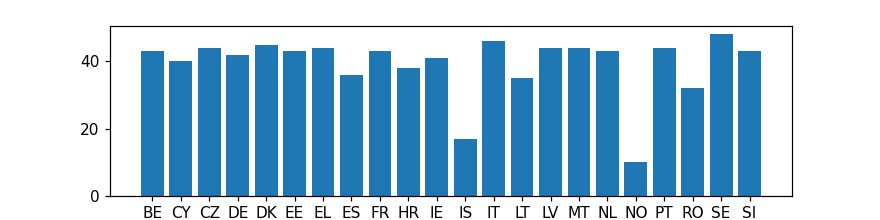

In [9]:
count_by_countries = hospitality_weekly.groupby(['country_code']).size()#observations by country

#print(count_by_countries)#view stat
plt.figure(figsize=(8,2))
plt.bar(count_by_countries.index,count_by_countries)
subset = count_by_countries[count_by_countries >40].to_frame()#select contries with more than 40 observations

countries = subset.index.to_list()#create list of countries


Thus all next steps are provided for the subset of 8 european countries, which have enough observations.

In [10]:
print(countries)

countries_subset = hospitality_weekly.loc[hospitality_weekly['country_code'].isin(countries)]#selection of countries with many observations

['BE', 'CZ', 'DE', 'DK', 'EE', 'EL', 'FR', 'IE', 'IT', 'LV', 'MT', 'NL', 'PT', 'SE', 'SI']


It is also important to check observations per week. Table below describes that removing observations for the initial 4 weeks of the dataset we got identical data ranges form 14: 15 . also throght theses 4 initial weeks the virus wasn't spread so much so if we consider them with analysis will affect the observation 

In [11]:
count_by_weeks = countries_subset.groupby(['year_week']).size()#observations by country
print(count_by_weeks)#view counts

year_week
2020-06     1
2020-07     1
2020-08     2
2020-09     4
2020-10     9
2020-11    14
2020-12    14
2020-13    15
2020-14    15
2020-15    15
2020-16    15
2020-17    15
2020-18    15
2020-19    15
2020-20    15
2020-21    15
2020-22    15
2020-23    15
2020-24    15
2020-25    15
2020-26    15
2020-27    15
2020-28    15
2020-29    15
2020-30    15
2020-31    15
2020-32    15
2020-33    15
2020-34    15
2020-35    15
2020-36    15
2020-37    15
2020-38    15
2020-39    15
2020-40    15
2020-41    15
2020-42    15
2020-43    14
2020-44    15
2020-45    15
2020-46    15
2020-47    15
2020-48    15
2020-49    15
2020-50    15
2020-51    15
2020-52    14
2020-53    14
dtype: int64


Now we deal with subset of 15 countries by identical data ranges. 

In [12]:
countries_subset = countries_subset.loc[~countries_subset['year_week'].isin(['2020-06', '2020-07', '2020-08', '2020-09'])]#remove observations with lower sample size

It is also important to check data for missing values and to impute them if possible. as almost all the null values come from  "Weekly new hospital admissions per 100k" and "Weekly new ICU admissions per 100k"

In [13]:
print(countries_subset.shape)
countries_subset.isnull().sum()

(649, 12)


country                                      0
year_week                                    0
Weekly new ICU admissions per 100k         232
Weekly new hospital admissions per 100k     90
country_code                                 0
tests_done                                   0
population                                   0
testing_rate                                 0
positivity_rate                              0
dateRep                                      0
cases_weekly                                 0
deaths_weekly                                0
dtype: int64

Based on above analysi so we will drop these two columns
* Weekly new ICU admissions per 100k       ........       232
* Weekly new hospital admissions per 100k   .....     94

In [14]:
check2 = countries_subset[countries_subset.columns[countries_subset.columns.str.contains('Weekly')].to_list()].isnull()#check for rows without nan

rows_with_nan = countries_subset[check2.any(axis = 1)]#create subset

rows_with_nan.groupby(['country']).size()#view countries

country
Belgium     11
Czechia      2
Denmark     44
Estonia     15
Germany     42
Greece      44
Ireland      2
Italy       44
Latvia      20
Malta       10
Portugal    44
Sweden      44
dtype: int64

Using chunk of the code above there were found that two columns of the final dataset with the names starting from 'Weekly' keeps NaN values across most of the rows. This kind of statistics can not be imputed through other columns, so they will be removed.

In [15]:
countries_subset = countries_subset.drop(countries_subset.columns[countries_subset.columns.str.contains('Weekly')].to_list(), axis=1)#remove columns with null


countries_subset.head()#view head

,country,year_week,country_code,tests_done,population,testing_rate,positivity_rate,dateRep,cases_weekly,deaths_weekly
0,Belgium,2020-11,BE,9924,11455519,86.630732,17.482870,16/03/2020,1735,31
1,Belgium,2020-12,BE,17066,11455519,148.976227,27.036212,23/03/2020,4614,265
2,Belgium,2020-13,BE,27141,11455519,236.925101,31.465311,30/03/2020,8540,874
3,Belgium,2020-14,BE,38426,11455519,335.436570,25.737782,06/04/2020,9890,1671
4,Belgium,2020-15,BE,53517,11455519,467.172199,18.270830,13/04/2020,9778,1999


check the data if any null still exist 

In [16]:
countries_subset.isnull().sum()

country            0
year_week          0
country_code       0
tests_done         0
population         0
testing_rate       0
positivity_rate    0
dateRep            0
cases_weekly       0
deaths_weekly      0
dtype: int64

In [17]:
countries_subset

,country,year_week,country_code,tests_done,population,testing_rate,positivity_rate,dateRep,cases_weekly,deaths_weekly
0,Belgium,2020-11,BE,9924,11455519,86.630732,17.482870,16/03/2020,1735,31
1,Belgium,2020-12,BE,17066,11455519,148.976227,27.036212,23/03/2020,4614,265
2,Belgium,2020-13,BE,27141,11455519,236.925101,31.465311,30/03/2020,8540,874
3,Belgium,2020-14,BE,38426,11455519,335.436570,25.737782,06/04/2020,9890,1671
4,Belgium,2020-15,BE,53517,11455519,467.172199,18.270830,13/04/2020,9778,1999
...,...,...,...,...,...,...,...,...,...,...
860,Sweden,2020-49,SE,261230,10230185,2553.521759,14.218122,07/12/2020,37142,446
861,Sweden,2020-50,SE,270944,10230185,2648.476054,16.016225,14/12/2020,43395,526
862,Sweden,2020-51,SE,299447,10230185,2927.092716,15.971107,21/12/2020,47825,379
863,Sweden,2020-52,SE,232114,10230185,2268.913026,16.840432,28/12/2020,39089,237
